In [16]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from time import time

## 1. Гіпотеза однорідності. Критерій пустих блоків
Перевірка рівності розподілів двох наборів спостережень. Не потрібно знати сам розподіл

In [3]:
def fill_bins(X, Y):
    sX = np.sort(X)
    sY = np.sort(Y)
    bins = np.zeros(sX.shape[0] + 1) # including bins (-inf; X_0) and (X_n; +inf)
    
    idy = 0
    for idx, x in enumerate(sX):
        while idy < sY.shape[0] and sY[idy] < x:
            idy += 1
            bins[idx] += 1
    bins[bins.shape[0]-1] = sY.shape[0] - idy 
    return bins

In [4]:
X = np.arange(0,20,2).astype(np.float64)
print(X)
np.random.shuffle(X)

[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18.]


In [5]:
Y = np.array([-2,-3, -1, 1, 3, 5, 6, 9, 11, 11.1, 11.2, 11.3, 13, 15, 17, 19, 20, 21], dtype=np.float64)
print(Y)
np.random.shuffle(Y)

[-2.  -3.  -1.   1.   3.   5.   6.   9.  11.  11.1 11.2 11.3 13.  15.
 17.  19.  20.  21. ]


In [6]:
fill_bins(X, Y)

array([3., 1., 1., 1., 1., 1., 4., 1., 1., 1., 3.])

In [7]:
# r - number of boxes for X
def emptybins_paired_test(X, Y, gamma=0.05):
    n = X.shape[0]
    m = Y.shape[0]
    rho = float(m)/n
    z = sp.stats.norm.ppf(1-gamma)
    k_crit = float(n)/(1+rho) + np.sqrt(n) * rho * z * np.float_power(1+rho, -3/2)

    bins = fill_bins(X, Y)
    k = (bins == 0).sum()
    
    print(f'emptybins_paired_test(n={n}, m={m}, gamma={gamma})')
    print(f'> empty bins number k = {k}')
    print(f'> k_crit = {k_crit}')
    
    if k > k_crit:
        print("> criteria failed. k > k_crit")
        return False
        
    print("> OK - criteria satisfied. k < k_crit")
    return True

In [8]:
Ns = [  500,   5000,  50_000 ]
Ms = [ 1000, 10_000, 100_000 ]

for n,m in zip(Ns,Ms):
    print("lambda_x = lambda_y = 1")
    X = sp.stats.expon.rvs(scale = 1, size=n)
    Y = sp.stats.expon.rvs(scale = 1, size=m)
    emptybins_paired_test(X,Y)
    print("---")
    print("lambda_x = 1; lambda_y = 1.3")
    X = sp.stats.expon.rvs(scale = 1, size=n)
    Y = sp.stats.expon.rvs(scale = 1/1.3, size=m)
    emptybins_paired_test(X,Y)
    print("---")


lambda_x = lambda_y = 1
emptybins_paired_test(n=500, m=1000, gamma=0.05)
> empty bins number k = 154
> k_crit = 180.8233126758487
> OK - criteria satisfied. k < k_crit
---
lambda_x = 1; lambda_y = 1.3
emptybins_paired_test(n=500, m=1000, gamma=0.05)
> empty bins number k = 178
> k_crit = 180.8233126758487
> OK - criteria satisfied. k < k_crit
---
lambda_x = lambda_y = 1
emptybins_paired_test(n=5000, m=10000, gamma=0.05)
> empty bins number k = 1659
> k_crit = 1711.433912084415
> OK - criteria satisfied. k < k_crit
---
lambda_x = 1; lambda_y = 1.3
emptybins_paired_test(n=5000, m=10000, gamma=0.05)
> empty bins number k = 1721
> k_crit = 1711.433912084415
> criteria failed. k > k_crit
---
lambda_x = lambda_y = 1
emptybins_paired_test(n=50000, m=100000, gamma=0.05)
> empty bins number k = 16691
> k_crit = 16808.23312675849
> OK - criteria satisfied. k < k_crit
---
lambda_x = 1; lambda_y = 1.3
emptybins_paired_test(n=50000, m=100000, gamma=0.05)
> empty bins number k = 17181
> k_crit = 168

## 2. Гіпотеза незалежності.

1. Критерій Спірмена
2. Критерій Кендалла

### 2.1. Критерій Спірмена

In [9]:
# len(X) == len(Y) !
def spearman_ind_criteria(X, Y, gamma=0.05):
    if X.shape != Y.shape: 
        raise ValueError("X and Y shapes should be equal")
    n = X.shape[0]
    
    rX = sp.stats.rankdata(X)
    rY = sp.stats.rankdata(Y)

    z = sp.stats.norm.ppf(1-(gamma/2))
    R_crit = z/np.sqrt(n    )
    R = 1 - (np.square(rX-rY).sum()) * 6 / (n*(n*n-1))
    print(f"spearman_ind_criteria(n={n}, gamma={gamma})")
    print(f"> R = {R}")
    print(f"> R_crit = {R_crit}")

    if np.abs(R) > R_crit:
        print("> criteria failed. |R| > R_crit")
        return False
        
    print("> OK - criteria satisfied. |R| < R_crit")
    return True

In [11]:
Ns = [500, 5000, 50_000]

for n in Ns:
    xi = np.random.rand(n)
    eta = np.random.rand(n)*2 - 1

    print("'independant', (X,Y) = (xi, xi*eta)")
    X = xi
    Y = xi * eta
    spearman_ind_criteria(X,Y)
    print("---")
    
    print("dependant, (X,Y) = (xi, xi + eta)")
    X = xi
    Y = xi + eta
    spearman_ind_criteria(X,Y)
    print("---")

'independant', (X,Y) = (xi, xi*eta)
spearman_ind_criteria(n=500, gamma=0.05)
> R = -0.06888046752187016
> R_crit = 0.08765225405765815
> OK - criteria satisfied. |R| < R_crit
---
dependant, (X,Y) = (xi, xi + eta)
spearman_ind_criteria(n=500, gamma=0.05)
> R = 0.3693541814167257
> R_crit = 0.08765225405765815
> criteria failed. |R| > R_crit
---
'independant', (X,Y) = (xi, xi*eta)
spearman_ind_criteria(n=5000, gamma=0.05)
> R = 0.002077805843112235
> R_crit = 0.027718076486993554
> OK - criteria satisfied. |R| < R_crit
---
dependant, (X,Y) = (xi, xi + eta)
spearman_ind_criteria(n=5000, gamma=0.05)
> R = 0.42862615944904636
> R_crit = 0.027718076486993554
> criteria failed. |R| > R_crit
---
'independant', (X,Y) = (xi, xi*eta)
spearman_ind_criteria(n=50000, gamma=0.05)
> R = -0.00822124623976861
> R_crit = 0.008765225405765815
> OK - criteria satisfied. |R| < R_crit
---
dependant, (X,Y) = (xi, xi + eta)
spearman_ind_criteria(n=50000, gamma=0.05)
> R = 0.4210388727078076
> R_crit = 0.008765

### 2.2. Критерій Кендалла

In [21]:
# len(X) == len(Y) !
def kendall_ind_criteria(X, Y, gamma=0.05):
    if X.shape != Y.shape: 
        raise ValueError("X and Y shapes should be equal")
    n = X.shape[0]

    print(f"kendall_ind_criteria(n={n}, gamma={gamma})")

    T = None
    t = time()
    if (n < 10_000):
        arX = np.argsort(X)
        V = sp.stats.rankdata(Y)[arX]

        # calculate number of pairs (i,j), i<j such that V_i < V_j
        N = 0
        for i, Vi in enumerate(V[:n-1]):
            for Vj in V[i+1:]:
                if Vi < Vj: 
                    N += 1
        T = 4 * N / (n*(n-1)) - 1
        print(f"brute algo took {time() - t}s.")

    t = time()
    T_quick = sp.stats.kendalltau(X, Y, variant='c').statistic
    print(f"quick algo took {time() - t}s.")

    if T is None: 
        T = T_quick
        print(f"T_quick = {T_quick:.5f}")
    else:
        print(f"T = {T:.5f}, T_quick = {T_quick:.5f}")

    z = sp.stats.norm.ppf(1-(gamma/2))
    T_crit = 2*z/(3*np.sqrt(n))

    print(f"> T_crit = {T_crit}")

    if np.abs(T) > T_crit:
        print("> criteria failed. |T| > T_crit")
        return False
        
    print("> OK - criteria satisfied. |T| < T_crit")
    return True

In [22]:
Ns = [500, 5000, 50_000]

for n in Ns:
    xi = np.random.rand(n)
    eta = np.random.rand(n)*2 - 1

    print("'independant', (X,Y) = (xi, xi*eta)")
    X = xi
    Y = xi * eta
    kendall_ind_criteria(X,Y)
    print("---")
    
    print("dependant, (X,Y) = (xi, xi + eta)")
    X = xi
    Y = xi + eta
    kendall_ind_criteria(X,Y)
    print("---")

'independant', (X,Y) = (xi, xi*eta)
kendall_ind_criteria(n=500, gamma=0.05)
brute algo took 0.013999700546264648s.
quick algo took 0.0009980201721191406s.
T = -0.02317, T_quick = -0.02317
> T_crit = 0.05843483603843876
> OK - criteria satisfied. |T| < T_crit
---
dependant, (X,Y) = (xi, xi + eta)
kendall_ind_criteria(n=500, gamma=0.05)
brute algo took 0.01400446891784668s.
quick algo took 0.001996278762817383s.
T = 0.28838, T_quick = 0.28838
> T_crit = 0.05843483603843876
> criteria failed. |T| > T_crit
---
'independant', (X,Y) = (xi, xi*eta)
kendall_ind_criteria(n=5000, gamma=0.05)
brute algo took 1.3464395999908447s.
quick algo took 0.0036134719848632812s.
T = -0.01740, T_quick = -0.01740
> T_crit = 0.018478717657995705
> OK - criteria satisfied. |T| < T_crit
---
dependant, (X,Y) = (xi, xi + eta)
kendall_ind_criteria(n=5000, gamma=0.05)
brute algo took 1.0177149772644043s.
quick algo took 0.004948616027832031s.
T = 0.28045, T_quick = 0.28045
> T_crit = 0.018478717657995705
> criteria 

## 3. Гіпотеза випадковості.

In [73]:
def generate_nonrandom_sequence(n):
    xi = np.random.rand(n)*2 - 1
    X = xi.cumsum() / np.arange(1, n+1)
    return X

def generate_random_sequence(n):
    return np.random.rand(n)*2 - 1

Text(0.5, 1.0, 'random')

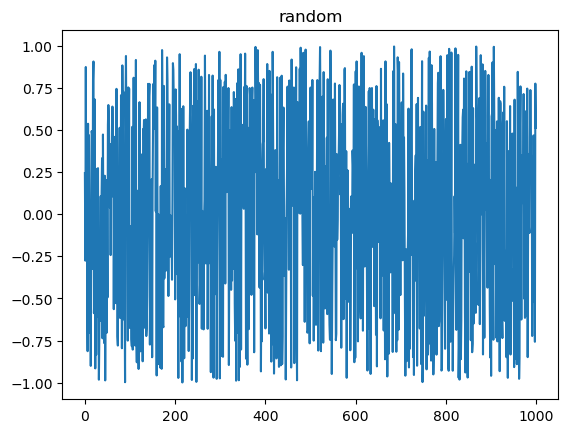

In [74]:
plt.plot(generate_random_sequence(1000))
plt.title('random')

Text(0.5, 1.0, 'non-random')

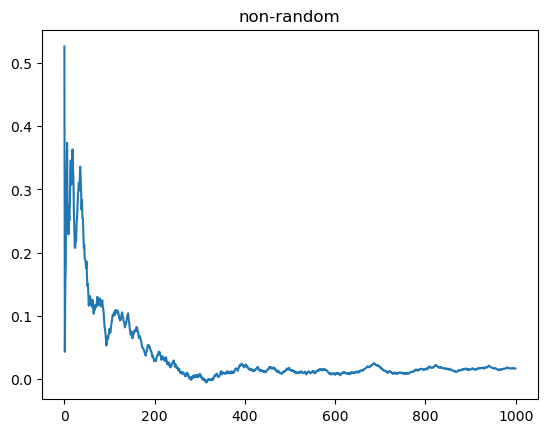

In [75]:
plt.plot(generate_nonrandom_sequence(1000))
plt.title('non-random')

In [47]:
def count_inversions(X):
    S = 0
    t = time()
    # calculate number of pairs (i,j), i<j such that X_i > X_j
    for i, Xi in enumerate(X[:n-1]):
        for Xj in X[i+1:]:
            if Xi > Xj: 
                S += 1
                
    print(f"brute count_inversions took {time() - t}s.")
    return S

In [31]:
X = np.array([3,5,4,0,2,1])
count_inversions(X)

brute count_inversions took 0.0s.


11

In [49]:
def randomness_test(X, gamma=0.05):
    n = X.shape[0]
    print(f"randomness_test(n={n}, gamma={gamma})")
    
    z = sp.stats.norm.ppf(1-(gamma/2))
    S0 = int(n*(n-1)/4)
    delta_S_crit = int(z * n * np.sqrt(n) / 6)
    S = count_inversions(X)
    print(f"> S_0 = {S0};    delta_S_crit = {delta_S_crit}")
    print(f"> S = {S};    delta_S = {np.abs(S - S0)}")

    if np.abs(S - S0) > delta_S_crit:
        print("> criteria failed. |S - S0| > z")
        return False
        
    print("> OK - criteria satisfied. |S - S0| < z")
    return True

In [78]:
Ns = [ 500, 5000, 50_000 ]
for n in Ns:
    print("random.")
    X = generate_random_sequence(n)
    randomness_test(X)
    print("---")
    print("non-random.")
    X = generate_nonrandom_sequence(n)
    randomness_test(X)
    print("---")

random.
randomness_test(n=500, gamma=0.05)
brute count_inversions took 0.012029886245727539s.
> S_0 = 62375;    delta_S_crit = 3652
> S = 63876;    delta_S = 1501
> OK - criteria satisfied. |S - S0| < z
---
non-random.
randomness_test(n=500, gamma=0.05)
brute count_inversions took 0.00915980339050293s.
> S_0 = 62375;    delta_S_crit = 3652
> S = 47819;    delta_S = 14556
> criteria failed. |S - S0| > z
---
random.
randomness_test(n=5000, gamma=0.05)
brute count_inversions took 0.9801998138427734s.
> S_0 = 6248750;    delta_S_crit = 115491
> S = 6305993;    delta_S = 57243
> OK - criteria satisfied. |S - S0| < z
---
non-random.
randomness_test(n=5000, gamma=0.05)
brute count_inversions took 0.9973917007446289s.
> S_0 = 6248750;    delta_S_crit = 115491
> S = 8467335;    delta_S = 2218585
> criteria failed. |S - S0| > z
---
random.
randomness_test(n=50000, gamma=0.05)
brute count_inversions took 93.29709100723267s.
> S_0 = 624987500;    delta_S_crit = 3652177
> S = 627775107;    delta_S 